In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
def draw(ksi, mu, sigma, p, a, b):
    def univariate_normal(x, mean, variance):
        return np.exp(-(x - mean)**2/(2*variance)) / np.sqrt(2*np.pi*variance)

    x, y = np.arange(a, b, 0.001), [[] for i in range(len(mu))]
    for i in range(len(mu)):
        y[i] = p[i] * univariate_normal(x, mean=mu[i], variance=sigma[i]**2)

    plt.figure(figsize=(8, 4))
    plt.hist(ksi, bins=100, density=True)

    for i in range(len(mu)):
        plt.plot(x, y[i], color="black")

    plt.plot(x, sum([y[i] for i in range(len(mu))]), color="red", linewidth=3)
    
    return plt.show()

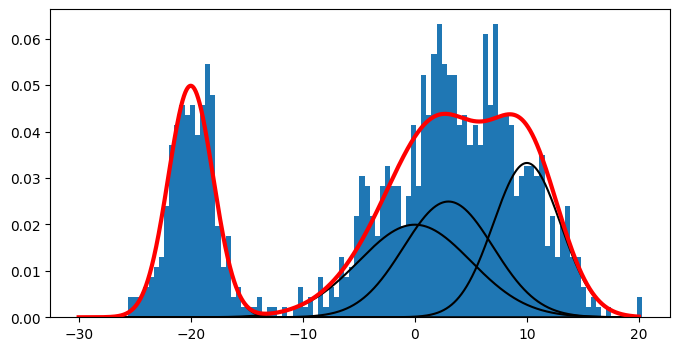

In [8]:
mu = [-20, 0, 3, 10]
sigma = [2, 5, 4, 3]
p = [1/4, 1/4, 1/4, 1/4]
n = 1000

# mu = [5, 10]
# sigma = [1, 1]
# p = [1/3, 2/3]
# n = 500

ksi = []
for i in range(n):
    index = np.argmax(np.random.multinomial(1, p))
    ksi_i = np.random.normal(mu[index], sigma[index])
    ksi.append(ksi_i)

draw(ksi, mu, sigma, p, -30, 20)
# draw(ksi, mu, sigma, p, 0, 15)

Ітерація №2: \par $p=[0.2462 0.3671 0.1512 0.2382],\ $ $\mu=[-20.0009   5.4134   0.3071   5.9483],\ $ $\sigma=[1.9721 5.5011 7.2781 5.0285]$


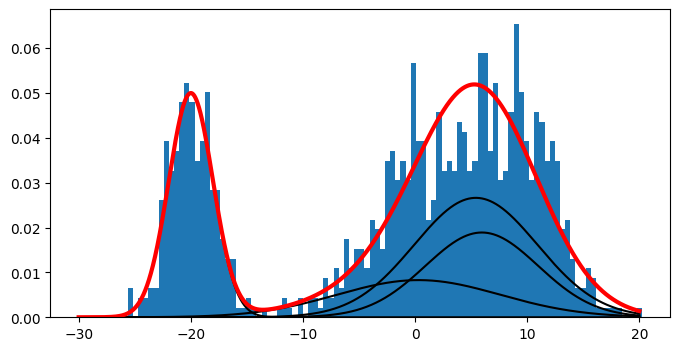

Ітерація №4: \par $p=[0.2481 0.3634 0.1524 0.2366],\ $ $\mu=[-19.9829   5.4214   0.2664   6.2038],\ $ $\sigma=[1.9911 5.5429 6.7313 5.0915]$


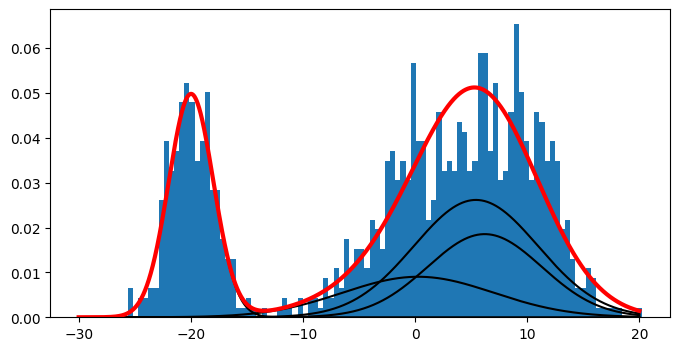

Ітерація №8: \par $p=[0.2491 0.3569 0.1601 0.2343],\ $ $\mu=[-19.9712   5.4029  -0.0211   6.7346],\ $ $\sigma=[2.0014 5.5299 6.1487 4.9084]$


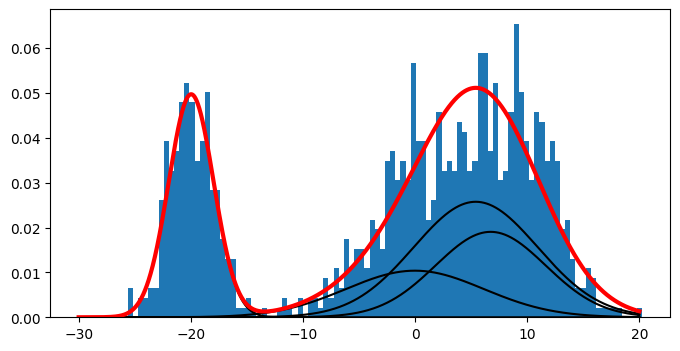

Ітерація №16: \par $p=[0.2502 0.3319 0.1844 0.2354],\ $ $\mu=[-19.9565   5.1361  -0.7891   8.3725],\ $ $\sigma=[2.0152 5.4369 5.0238 3.8634]$


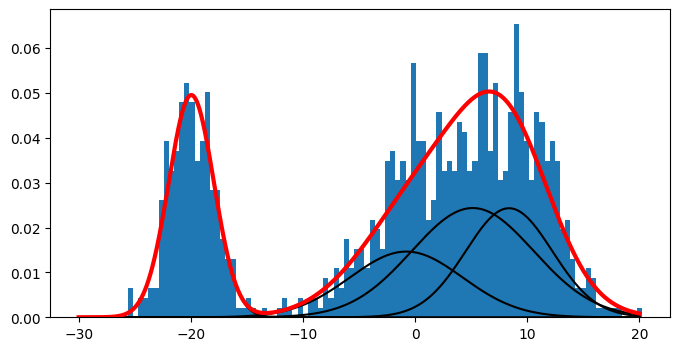

Ітерація №32: \par $p=[0.251  0.2996 0.2081 0.2412],\ $ $\mu=[-19.9408   4.4532  -0.826    9.7843],\ $ $\sigma=[2.034  5.0909 4.4923 2.9776]$


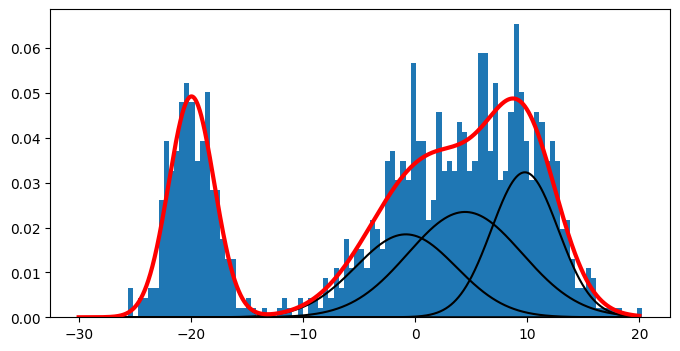

Ітерація №64: \par $p=[0.2508 0.3039 0.2129 0.2323],\ $ $\mu=[-19.944    4.2744  -0.4475   9.9626],\ $ $\sigma=[2.0301 5.1157 4.7283 2.8893]$


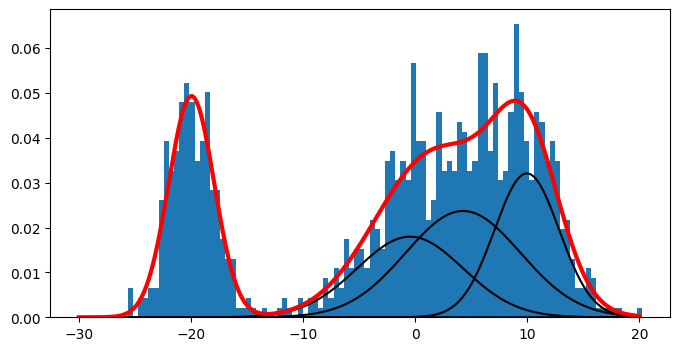

In [6]:
def EM(Q_previous, ksi):
    Q = Q_previous

    n = len(ksi)
    m = len(Q[0])

    # overestimation of probabilities
    for j in range(m):
        f = np.array([0.0 for i in range(n)])
        for k in range(n):
            for i in range(m):    
                f[k] += Q[0][i]*np.exp(-pow(ksi[k]-Q[1][i],2)/(2*Q[2][i]**2))/Q[2][i]
            if f[k] == 0.0: f[k] = f.mean()

        sum = 0
        for k in range(n):
            sum += Q[0][j]*np.exp(-pow(ksi[k]-Q[1][j],2)/(2*Q[2][j]**2))/Q[2][j]/f[k]

        Q[0][j] = sum/n

    # overestimation of mathematical expectations
    for j in range(m):
        f = np.array([0.0 for i in range(n)])
        for k in range(n):
            for i in range(m):    
                f[k] += Q[0][i]*np.exp(-pow(ksi[k]-Q[1][i],2)/(2*Q[2][i]**2))/Q[2][i]
            if f[k] == 0.0: f[k] = f.mean()
        
        w = np.array([0.0 for i in range(n)])
        sum_up, sum_down = 0, 0
        for k in range(n):
            w[k] = Q[0][j]*np.exp(-pow(ksi[k]-Q[1][j],2)/(2*Q[2][j]**2))/Q[2][j]/f[k]
            sum_up += ksi[k]*w[k]
            sum_down += w[k]

        Q[1][j] = sum_up/sum_down

    # overestimation of variances
    for j in range(m):
        f = np.array([0.0 for i in range(n)])
        for k in range(n):
            for i in range(m):    
                f[k] += Q[0][i]*np.exp(-pow(ksi[k]-Q[1][i],2)/(2*Q[2][i]**2))/Q[2][i]
            if f[k] == 0.0: f[k] = f.mean()
        
        w = np.array([0.0 for i in range(n)])
        sum_up, sum_down = 0, 0
        for k in range(n):
            w[k] = Q[0][j]*np.exp(-pow(ksi[k]-Q[1][j],2)/(2*Q[2][j]**2))/Q[2][j]/f[k]
            sum_up += pow(ksi[k]-Q[1][j],2)*w[k]
            sum_down += w[k]

        Q[2][j] = np.sqrt(sum_up/sum_down)

    return Q

Q = np.array([[0.1, 0.5, 0.1, 0.3], [-20, 5, 5, 5], [1, 4, 8, 4]])

# Q = [[0.2, 0.8], [7, 7], [1, 1]]

for i in range(65):
    Q = EM(Q, ksi)
    if (i in [2,4,8,16,32,64]):
        print(f"Ітерація №{i}: \par $p={np.round(Q[0],4)},\ $ $\mu={np.round(Q[1],4)},\ $ $\sigma={  np.round(Q[2],4)}$")
        draw(ksi, Q[1], Q[2], Q[0], -30, 20)
        # draw(ksi, Q[1], Q[2], Q[0], 0, 15)

# epsilon = 0.06
# i = 0
# delta = max([abs(Q[1][0]-10), abs(Q[1][1]-5)])
# while (delta > epsilon):
#     Q = EM(Q, ksi)
#     delta = max([abs(Q[1][0]-10), abs(Q[1][1]-5)])
#     print(delta)
#     i += 1